In [1]:
import numpy as np
from scipy import sparse
import pandas as pd
from preamble import *
%matplotlib inline
from sklearn.model_selection import train_test_split

Using multiple models with varying set of features. Either starting with no features and adding them one by one or starting with all and removing one by one. Adding and removing is done until a criterion is met.
One method is *recursive feature elimination* (**RFE**) starting with all features.

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add noise features to the data
# the first 30 features are from the dataset, the
# next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)

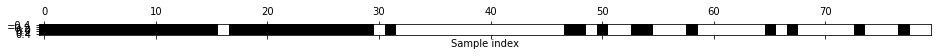

In [3]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
select = RFE(RandomForestClassifier(
    n_estimators=100, random_state=42), n_features_to_select=40)
select.fit(X_train, y_train)

# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

In [4]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

from sklearn.linear_model import LogisticRegression
# run with the original values
score = LogisticRegression().fit(
    X_train, y_train).score(X_test, y_test)
print("Test score original data: {:.3f}".format(score))
# Using only the selected features
score = LogisticRegression().fit(
    X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score selected features: {:.3f}".format(score))

Test score original data: 0.930
Test score selected features: 0.951


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0, test_size=.5)
rfe = RandomForestClassifier(n_estimators=100, random_state=42)
rfe.fit(X_train, y_train)
print("Score for Random Forest on original data: {:.3f}".format(
    rfe.score(X_test, y_test)))

Score for Random Forest on original data: 0.944
